<a href="https://colab.research.google.com/github/abdullahmusawar98-design/EMAIL-CLASSIFIER/blob/main/ML_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
# Upload your file first
from google.colab import files
uploaded = files.upload()

Saving spam.csv to spam.csv


In [12]:
# Attempt to load the dataset with a different encoding
file_path = 'spam.csv'  # Path to the uploaded file

# Trying different encoding
df = pd.read_csv(file_path, encoding='ISO-8859-1')

# Inspecting the first few rows of the dataset
print(df.head())


  class                                            message Unnamed: 2  \
0   ham  Go until jurong point, crazy.. Available only ...        NaN   
1   ham                      Ok lar... Joking wif u oni...        NaN   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3   ham  U dun say so early hor... U c already then say...        NaN   
4   ham  Nah I don't think he goes to usf, he lives aro...        NaN   

  Unnamed: 3 Unnamed: 4  
0        NaN        NaN  
1        NaN        NaN  
2        NaN        NaN  
3        NaN        NaN  
4        NaN        NaN  


In [20]:
#Classification Model using Logistic Regression
# Importing necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

# Loading the dataset
file_path = 'spam.csv'  # Path to the uploaded file
df = pd.read_csv(file_path, encoding='ISO-8859-1')

# Checking the columns to ensure they match
print(df.columns)

# Preprocessing the data
# Handling any missing values
df = df.dropna(subset=['class', 'message'])

# Features: 'message', Target variable: 'class'
X = df['message']
y = df['class']

# Encoding the labels ('ham' -> 0, 'spam' -> 1)
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Splitting the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Converting the text data to numerical form using TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Model 1: Logistic Regression with Hyperparameter Tuning using GridSearchCV
logreg_model = LogisticRegression(max_iter=1000)

# Hyperparameter tuning for Logistic Regression (using GridSearchCV)
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # Regularization strength
    'solver': ['liblinear', 'saga']  # Solvers for optimization
}
grid_search_logreg = GridSearchCV(logreg_model, param_grid, cv=5, scoring='accuracy')
grid_search_logreg.fit(X_train_tfidf, y_train)

# Best hyperparameters from GridSearchCV
best_logreg_model = grid_search_logreg.best_estimator_

# Making predictions with Logistic Regression
y_pred_logreg = best_logreg_model.predict(X_test_tfidf)

# Evaluating the Logistic Regression model
print("Logistic Regression Model Evaluation (with Hyperparameter Tuning):")
print("Best Parameters:", grid_search_logreg.best_params_)
print("Accuracy:", accuracy_score(y_test, y_pred_logreg))
print("Classification Report:\n", classification_report(y_test, y_pred_logreg))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_logreg))


Index(['class', 'message', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')
Logistic Regression Model Evaluation (with Hyperparameter Tuning):
Best Parameters: {'C': 100, 'solver': 'liblinear'}
Accuracy: 0.9766816143497757
Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       965
           1       0.97      0.85      0.91       150

    accuracy                           0.98      1115
   macro avg       0.97      0.92      0.95      1115
weighted avg       0.98      0.98      0.98      1115

Confusion Matrix:
 [[961   4]
 [ 22 128]]


Logistic Regression Model Evaluation (with Hyperparameter Tuning):
Best Parameters: {'C': 100, 'solver': 'liblinear'}
Accuracy: 0.9766816143497757
Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       965
           1       0.97      0.85      0.91       150

    accuracy                           0.98      1115
   macro avg       0.97      0.92      0.95      1115
weighted avg       0.98      0.98      0.98      1115

Confusion Matrix:
 [[961   4]
 [ 22 128]]


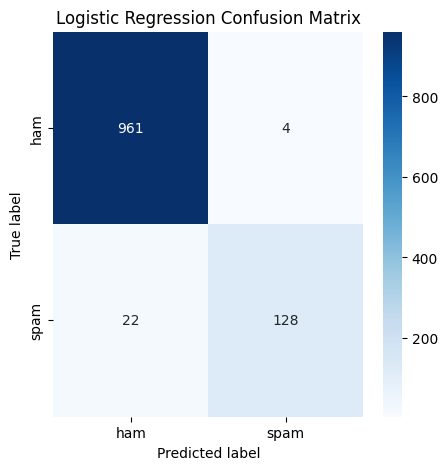

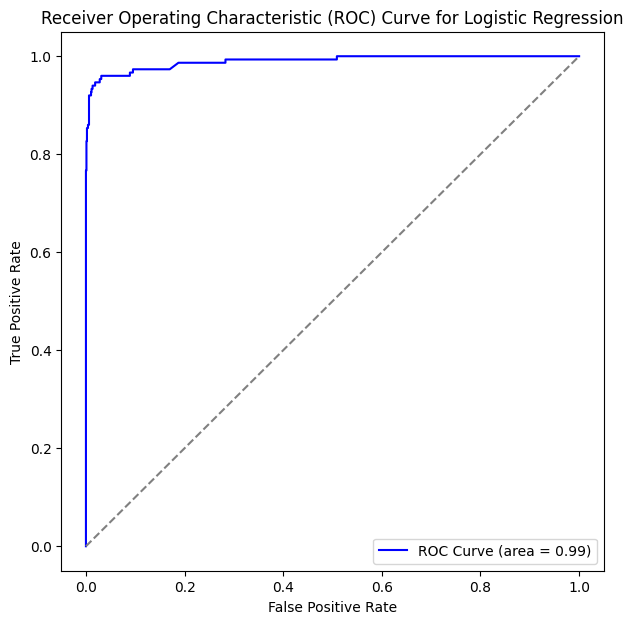

In [15]:
# Importing necessary libraries for plotting
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc

# Plotting function for confusion matrix
def plot_confusion_matrix(cm, classes, title='Confusion Matrix', cmap=plt.cm.Blues):
    plt.figure(figsize=(5,5))
    sns.heatmap(cm, annot=True, fmt='d', cmap=cmap, xticklabels=classes, yticklabels=classes)
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

# Model 1: Logistic Regression with Hyperparameter Tuning using GridSearchCV
logreg_model = LogisticRegression(max_iter=1000)

# Hyperparameter tuning for Logistic Regression (using GridSearchCV)
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # Regularization strength
    'solver': ['liblinear', 'saga']  # Solvers for optimization
}
grid_search_logreg = GridSearchCV(logreg_model, param_grid, cv=5, scoring='accuracy')
grid_search_logreg.fit(X_train_tfidf, y_train)

# Best hyperparameters from GridSearchCV
best_logreg_model = grid_search_logreg.best_estimator_

# Making predictions with Logistic Regression
y_pred_logreg = best_logreg_model.predict(X_test_tfidf)

# Evaluating the Logistic Regression model
print("Logistic Regression Model Evaluation (with Hyperparameter Tuning):")
print("Best Parameters:", grid_search_logreg.best_params_)
print("Accuracy:", accuracy_score(y_test, y_pred_logreg))
print("Classification Report:\n", classification_report(y_test, y_pred_logreg))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_logreg))

# Confusion Matrix for Logistic Regression
cm_logreg = confusion_matrix(y_test, y_pred_logreg)
plot_confusion_matrix(cm_logreg, classes=le.classes_, title="Logistic Regression Confusion Matrix")

# ROC Curve for Logistic Regression
fpr, tpr, _ = roc_curve(y_test, best_logreg_model.predict_proba(X_test_tfidf)[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(7,7))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.title('Receiver Operating Characteristic (ROC) Curve for Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

Index(['class', 'message', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')
Decision Tree Model Evaluation (with Hyperparameter Tuning):
Best Parameters: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5}
Accuracy: 0.9704035874439462
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.98       965
           1       0.93      0.85      0.89       150

    accuracy                           0.97      1115
   macro avg       0.95      0.92      0.93      1115
weighted avg       0.97      0.97      0.97      1115

Confusion Matrix:
 [[955  10]
 [ 23 127]]


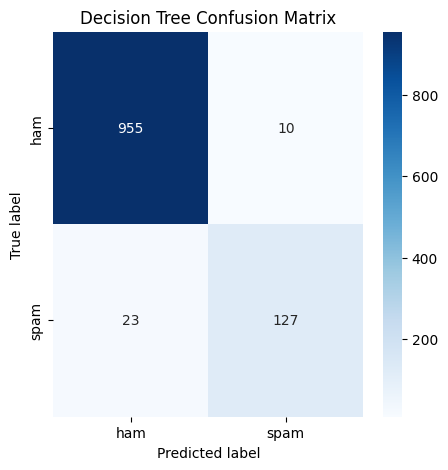

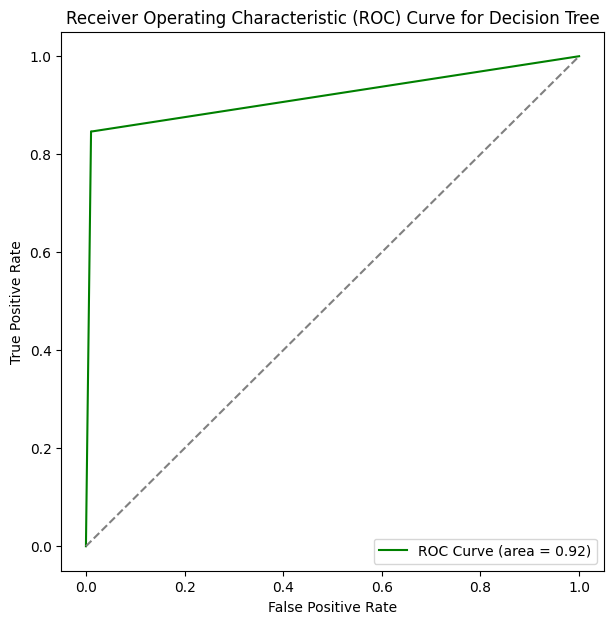

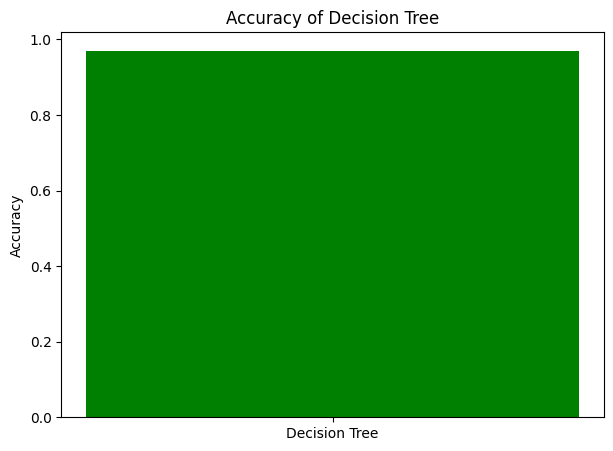

In [38]:
# Classification Model using Decision Trees
# Importing necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the dataset
file_path = 'spam.csv'  # Path to the uploaded file
df = pd.read_csv(file_path, encoding='ISO-8859-1')

# Checking the columns to ensure they match
print(df.columns)

# Preprocessing the data
# Handling any missing values by dropping rows with missing 'class' or 'message'
df = df.dropna(subset=['class', 'message'])

# Features: 'message', Target variable: 'class'
X = df['message']
y = df['class']

# Encoding the labels ('ham' -> 0, 'spam' -> 1)
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Splitting the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Converting the text data to numerical form using TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Model Selection: Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42)

# Hyperparameter tuning for Decision Tree (using GridSearchCV)
param_grid_dt = {
    'max_depth': [5, 10, 20, None],  # Tree depth
    'min_samples_split': [2, 5, 10],  # Minimum samples to split
    'min_samples_leaf': [1, 2, 5],  # Minimum samples at leaf nodes
    'criterion': ['gini', 'entropy']  # Gini index or Entropy for splitting
}
grid_search_dt = GridSearchCV(dt_model, param_grid_dt, cv=5, scoring='accuracy')
grid_search_dt.fit(X_train_tfidf, y_train)

# Best hyperparameters from GridSearchCV
best_dt_model = grid_search_dt.best_estimator_

# Making predictions with Decision Tree
y_pred_dt = best_dt_model.predict(X_test_tfidf)

# Evaluating the Decision Tree model
print("Decision Tree Model Evaluation (with Hyperparameter Tuning):")
print("Best Parameters:", grid_search_dt.best_params_)
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Classification Report:\n", classification_report(y_test, y_pred_dt))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))

# Confusion Matrix for Decision Tree
cm_dt = confusion_matrix(y_test, y_pred_dt)

# Plotting the confusion matrix
def plot_confusion_matrix(cm, classes, title='Confusion Matrix', cmap=plt.cm.Blues):
    plt.figure(figsize=(5,5))
    sns.heatmap(cm, annot=True, fmt='d', cmap=cmap, xticklabels=classes, yticklabels=classes)
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

plot_confusion_matrix(cm_dt, classes=le.classes_, title="Decision Tree Confusion Matrix")

# ROC Curve for Decision Tree
fpr_dt, tpr_dt, _ = roc_curve(y_test, best_dt_model.predict_proba(X_test_tfidf)[:, 1])
roc_auc_dt = auc(fpr_dt, tpr_dt)

plt.figure(figsize=(7,7))
plt.plot(fpr_dt, tpr_dt, color='green', label=f'ROC Curve (area = {roc_auc_dt:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.title('Receiver Operating Characteristic (ROC) Curve for Decision Tree')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

# Accuracy comparison bar plot
accuracy_dt = accuracy_score(y_test, y_pred_dt)

plt.figure(figsize=(7,5))
plt.bar(['Decision Tree'], [accuracy_dt], color=['green'])
plt.title('Accuracy of Decision Tree')
plt.ylabel('Accuracy')
plt.show()


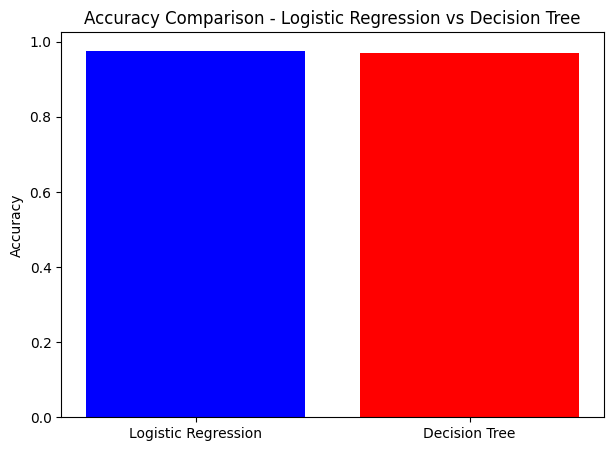

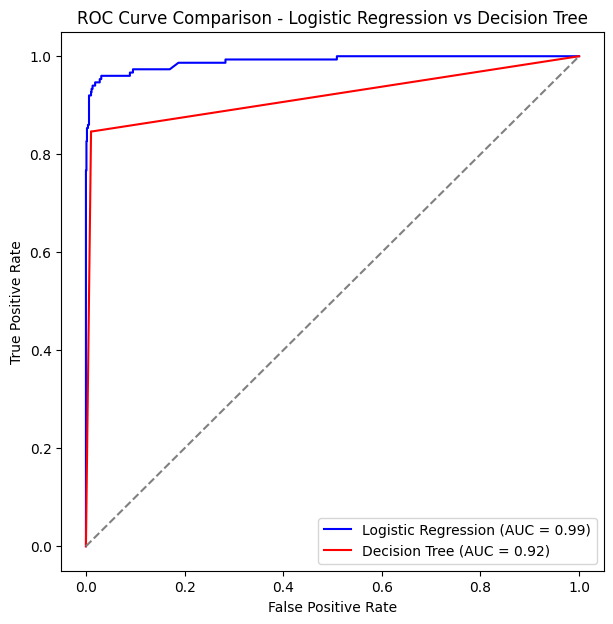

In [36]:
# Comparitive Analysis of Logistic Regression vs Decision Trees
# Comparing Both Models - Performance Metrics


# Create a bar plot to compare the accuracy of both models
accuracy_lr = accuracy_score(y_test, y_pred_logreg)
accuracy_dt = accuracy_score(y_test, y_pred_dt)

plt.figure(figsize=(7,5))
plt.bar(['Logistic Regression', 'Decision Tree'], [accuracy_lr, accuracy_dt], color=['blue', 'red'])
plt.title('Accuracy Comparison - Logistic Regression vs Decision Tree')
plt.ylabel('Accuracy')
plt.show()

# Compare ROC AUC Scores for both models
plt.figure(figsize=(7,7))
plt.plot(fpr_lr, tpr_lr, color='blue', label=f'Logistic Regression (AUC = {roc_auc_lr:.2f})')
plt.plot(fpr_dt, tpr_dt, color='red', label=f'Decision Tree (AUC = {roc_auc_dt:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.title('ROC Curve Comparison - Logistic Regression vs Decision Tree')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_20 (Dense)                │ (None, 512)            │     2,560,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,724,865 (10.39 MB)

 Trainable params: 2,724,865 (10.39 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
140/140 ━━━━━━━━━━━━━━━━━━━━ 10s 54ms/step - accuracy: 0.8473 - loss: 0.3764 - val_accuracy: 0.9605 - val_loss: 0.1436
Epoch 2/5
140/140 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - accuracy: 0.9872 - loss: 0.0726 - val_accuracy: 0.9812 - val_loss: 0.0797
Epoch 3/5
140/140 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - accuracy: 0.9965 - loss: 0.0180 - val_accuracy: 0.9821 - val_loss: 0.0933
Epoch 4/5
140/140 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - accuracy: 0.9991 - loss: 0.0046 - val_accuracy: 0.9803 - val_loss: 0.0980
Epoch 5/5
140/140 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - accuracy: 0.9997 - loss: 0.0012 - val_accuracy: 0.9830 - val_loss: 0.1123
Test Accuracy:  0.9811659455299377
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
Deep Learning Model Evaluation:
Accuracy: 0.9811659192825112
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       965
           1       0.94      0.91      0.93       150

    accuracy                        

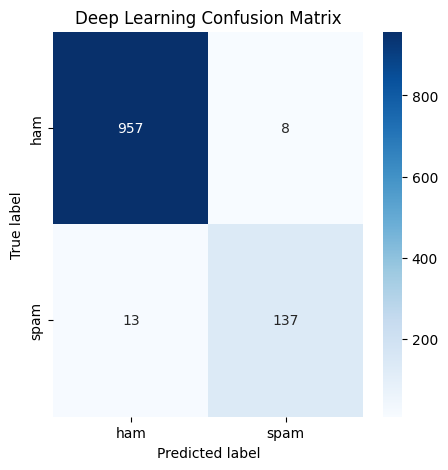

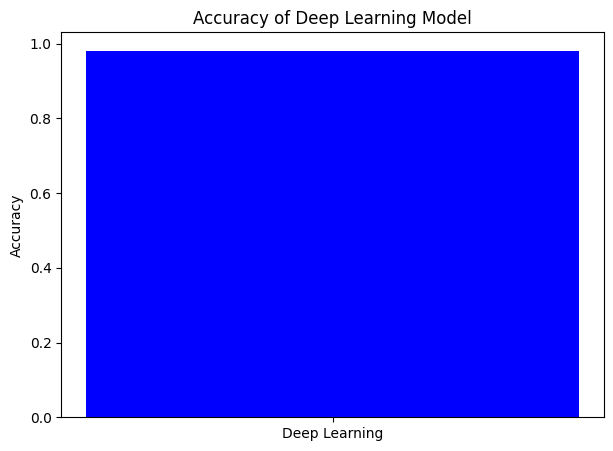

In [40]:
# Deep Learning Model using Neural Networks
# Importing necessary libraries for deep learning and training
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data (assuming it's preprocessed already as in the previous steps)
# You can reuse the preprocessed dataset (X_train_tfidf, X_test_tfidf, y_train, y_test) from previous steps

# Build the Neural Network Model (Deep Learning Architecture)
model = Sequential()

# Input layer: Input shape should match the number of features in X_train_tfidf (5000 features)
model.add(Dense(512, input_dim=X_train_tfidf.shape[1], activation='relu'))

# Add a Dropout layer to regularize and avoid overfitting
model.add(Dropout(0.5))

# Hidden Layer 1: Adding another dense layer
model.add(Dense(256, activation='relu'))

# Add another Dropout layer to regularize
model.add(Dropout(0.5))

# Hidden Layer 2: Adding a smaller dense layer
model.add(Dense(128, activation='relu'))

# Output layer: As it's a binary classification, use a single neuron with sigmoid activation
model.add(Dense(1, activation='sigmoid'))

# Compile the model: Using binary_crossentropy as loss function, Adam optimizer, and accuracy as metric
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# Summary of the model to visualize architecture
model.summary()

# Training the model: Adding early stopping to avoid overfitting and stop training if the accuracy does not improve
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

history = model.fit(X_train_tfidf, y_train,
                    epochs=5,
                    batch_size=32,
                    validation_data=(X_test_tfidf, y_test),
                    callbacks=[early_stopping])

# Evaluating the model on the test set
test_loss, test_accuracy = model.evaluate(X_test_tfidf, y_test, verbose=0)
print("Test Accuracy: ", test_accuracy)

# Making predictions on the test set
y_pred_dl = (model.predict(X_test_tfidf) > 0.5).astype("int32")

# Evaluating the model
print("Deep Learning Model Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred_dl))
print("Classification Report:\n", classification_report(y_test, y_pred_dl))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dl))

# Confusion Matrix for Deep Learning
cm_dl = confusion_matrix(y_test, y_pred_dl)

# Plotting the confusion matrix
def plot_confusion_matrix(cm, classes, title='Confusion Matrix', cmap=plt.cm.Blues):
    plt.figure(figsize=(5,5))
    sns.heatmap(cm, annot=True, fmt='d', cmap=cmap, xticklabels=classes, yticklabels=classes)
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

plot_confusion_matrix(cm_dl, classes=['ham', 'spam'], title="Deep Learning Confusion Matrix")



# Accuracy comparison bar plot
accuracy_dl = accuracy_score(y_test, y_pred_dl)

plt.figure(figsize=(7,5))
plt.bar(['Deep Learning'], [accuracy_dl], color=['blue'])
plt.title('Accuracy of Deep Learning Model')
plt.ylabel('Accuracy')
plt.show()


35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step


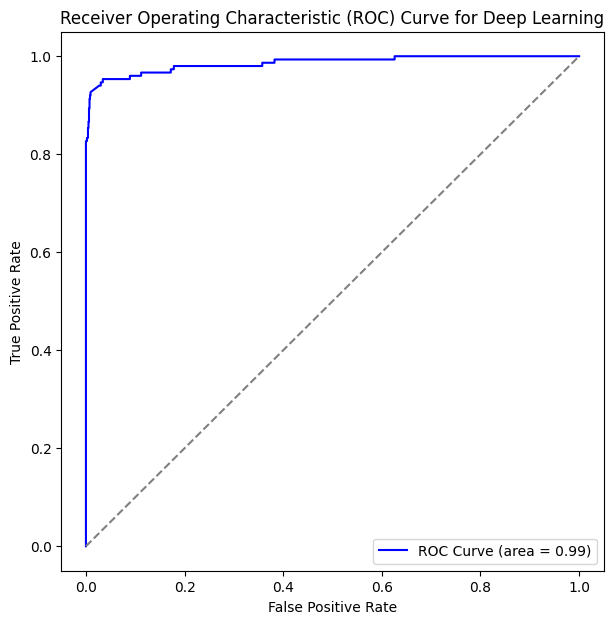

In [32]:
# ROC Curve for Deep Learning
y_pred_prob_dl = model.predict(X_test_tfidf)  # Get the predicted probabilities (between 0 and 1)
fpr_dl, tpr_dl, _ = roc_curve(y_test, y_pred_prob_dl[:, 0])  # Only take the probabilities for the positive class
roc_auc_dl = auc(fpr_dl, tpr_dl)

plt.figure(figsize=(7,7))
plt.plot(fpr_dl, tpr_dl, color='blue', label=f'ROC Curve (area = {roc_auc_dl:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.title('Receiver Operating Characteristic (ROC) Curve for Deep Learning')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()


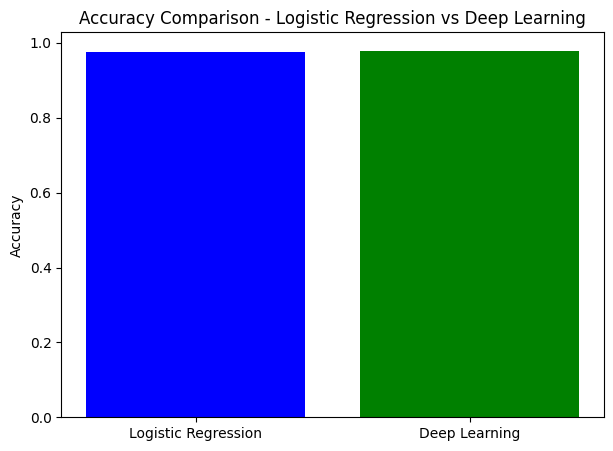

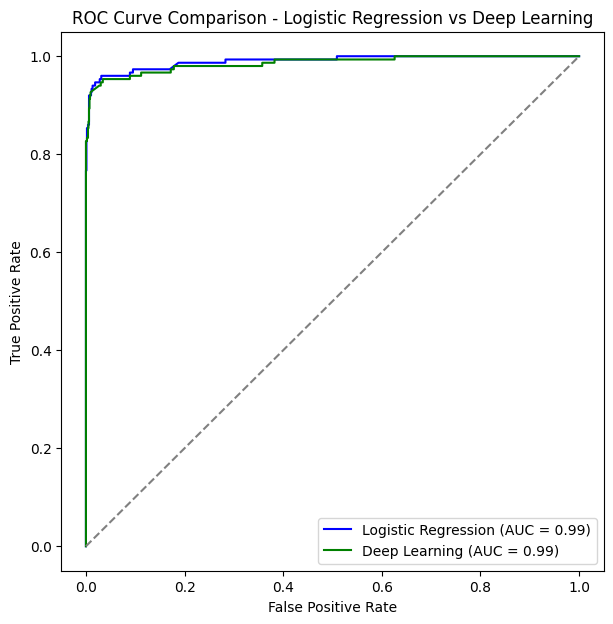

In [37]:
# Comparitive Anaysis of Logistic Regression vs Deep Learning
accuracy_dl = accuracy_score(y_test, y_pred_dl)

plt.figure(figsize=(7,5))
plt.bar(['Logistic Regression', 'Deep Learning'], [accuracy_score(y_test, y_pred_logreg), accuracy_dl], color=['blue', 'green'])
plt.title('Accuracy Comparison - Logistic Regression vs Deep Learning')
plt.ylabel('Accuracy')
plt.show()

# Compare ROC AUC Scores for both models
plt.figure(figsize=(7,7))
plt.plot(fpr_lr, tpr_lr, color='blue', label=f'Logistic Regression (AUC = {roc_auc_lr:.2f})')
plt.plot(fpr_dl, tpr_dl, color='green', label=f'Deep Learning (AUC = {roc_auc_dl:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.title('ROC Curve Comparison - Logistic Regression vs Deep Learning')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

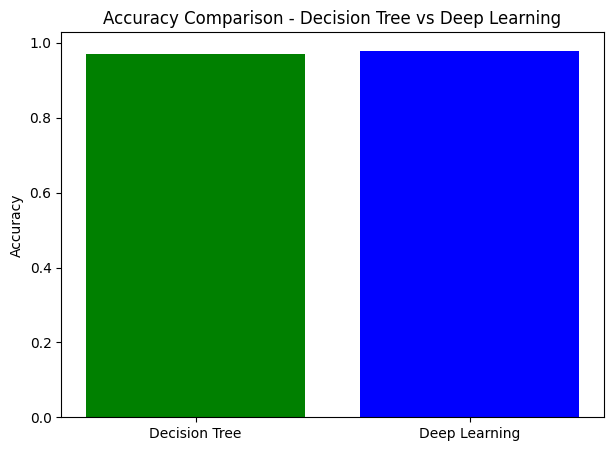

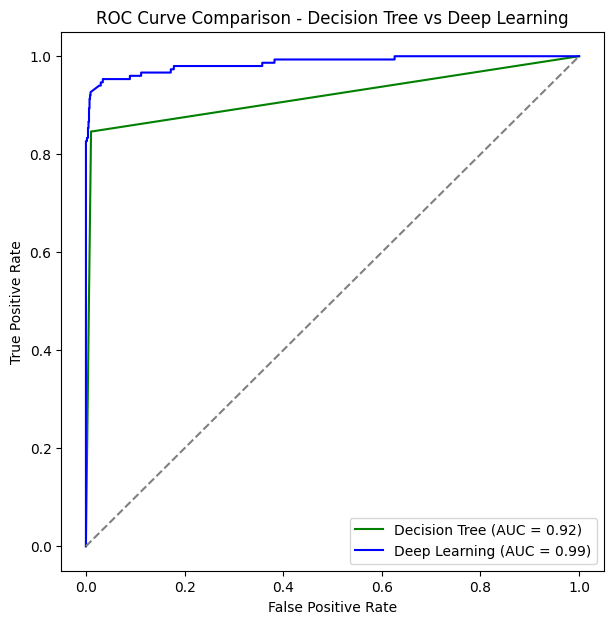

In [39]:
# Comparitive Analysis of Decision Trees vs Deep Learning

# Accuracy comparison bar plot
accuracy_dl = accuracy_score(y_test, y_pred_dl)

plt.figure(figsize=(7,5))
plt.bar(['Decision Tree', 'Deep Learning'], [accuracy_dt, accuracy_dl], color=['green', 'blue'])
plt.title('Accuracy Comparison - Decision Tree vs Deep Learning')
plt.ylabel('Accuracy')
plt.show()

# Compare ROC AUC Scores for both models
plt.figure(figsize=(7,7))
plt.plot(fpr_dt, tpr_dt, color='green', label=f'Decision Tree (AUC = {roc_auc_dt:.2f})')
plt.plot(fpr_dl, tpr_dl, color='blue', label=f'Deep Learning (AUC = {roc_auc_dl:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.title('ROC Curve Comparison - Decision Tree vs Deep Learning')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()